In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [2]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    x,y = make_blobs(n_samples=numSamples, centers=centroidLocation, cluster_std=clusterDeviation)
    x = StandardScaler().fit_transform(x)
    return x,y

x,y = createDataPoints([[4,3],[2,-1],[-1,4]],1500,0.5)

DBSCAN

In [3]:
# Parametros
# Epsilon : determina un radio especifico que si incluye suficientes puntos se transformaen un area densa
# minimumSamples : determina el numero minimo de datos que se quieren en una vecindad para definir el cluster

epsilon = 3
minimumSamples = 7
db = DBSCAN(eps=epsilon,min_samples=minimumSamples).fit(x)
labels = db.labels_

In [4]:
# Distincion de outliers

core_samples_mask = np.zeros_like(db.labels_,dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [5]:
# Numero clusters
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

1

In [6]:
# Remover los datos repetidos convirtiendo a set (conjunto)
unique_labels = set(labels)
unique_labels

{0}

Visualizacion

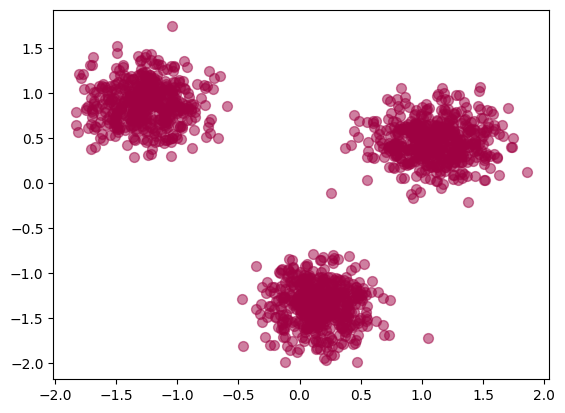

In [7]:
colors = plt.cm.Spectral(np.linspace(0,1,len(unique_labels)))

for k, col in zip(unique_labels,colors):
    if k == -1:
        col='k'
    class_member_mask = (labels == k)

    xy = x[class_member_mask & core_samples_mask]
    plt.scatter(xy[:,0],xy[:,1], s=50,c=[col],marker=u'o',alpha=0.5)

    xy = x[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:,0],xy[:,1],s=50,c=[col],marker=u'o',alpha=0.5)

C:\Users\angel\AppData\Local\Temp\ipykernel_14144\1884205319.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x[my_members, 0], x[my_members, 1],  c=col, marker=u'o', alpha=0.5)


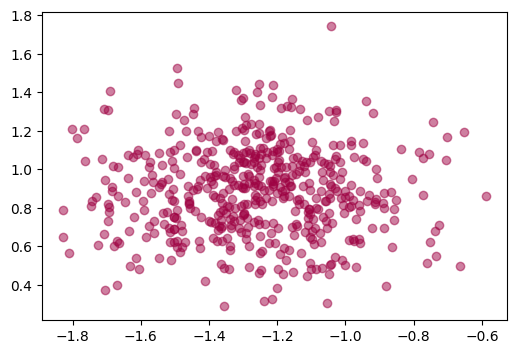

In [8]:
from sklearn.cluster import KMeans 
k = 3
k_means3 = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
k_means3.fit(x)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(k), colors):
    my_members = (k_means3.labels_ == k)
    plt.scatter(x[my_members, 0], x[my_members, 1],  c=col, marker=u'o', alpha=0.5)
plt.show()

### CLUSTER PARA ESTACION METEREOLOGICA

In [9]:
canada_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/weather-stations20140101-20141231.csv')
print(canada_df.shape)
canada_df.head(2)

(1341, 25)


,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040


In [10]:
canada_df = canada_df[pd.notnull(canada_df['Tm'])]
canada_df = canada_df.reset_index(drop=True)
canada_df.head(2)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040


In [14]:
from mpl_toolkits.basemap import Basemap
from pylab import rcParams

rcParams['figure.figsize'] = (14,10)
llon = -140
ulon = -50
llat = 40
ulat = 65

canada_df = canada_df[(canada_df['Long'] > llon) & (canada_df['Long'] < ulon) & (canada_df['Lat'] > llat) & (canada_df['Lat'] < ulat)]

my_map = Basemap(projection='merc',
                resolution = 'l', area_thresh = 1000.0,
                llcrnrlon=llon, llcrnrlat=llat,
                urcrnrlon=ulon, urcnrlat=ulat)
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='white',alpha=0.3)
my_map.shadeedrelief()

# Recoleccion de datos de estaciones
xs,ys = my_map(np.asarray(canada_df.Long),np.asarray(canada_df.Lat))
canada_df['xm'] = xs.tolist()
canada_df['ym'] = ys.tolist()

for index,row in canada_df.iterrows():
    my_map.plot(row.xm, row.ym, markerfacecolor=([1,0,0]), marker='o', markersize=5, alpha=0.75)
plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [ ]:
# Clustering basado en localizacion

from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = canada_df[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
canada_df["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
canada_df[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = canada_df[canada_df.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))

In [ ]:
# Cluster de estaciones segun localizacion, temperatura promedio, maxima y minima

from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = canada_df[['xm','ym','Tx','Tm','Tn']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
canada_df["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
canada_df[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = canada_df[canada_df.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))